In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import matplotlib.cm as cm
import math

In [2]:
img1 = cv2.imread('14.jpg') 

In [3]:
img2 = cv2.imread('24.jpg')

Text(0.5, 1.0, 'Original image2')

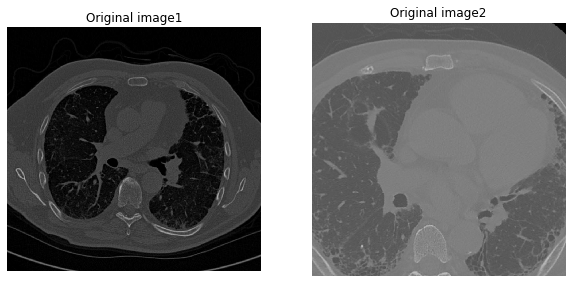

In [4]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img1,cmap = cm.gray)
plt.axis('off')
plt.title("Original image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img2,cmap = cm.gray)
plt.axis('off')
plt.title("Original image2")

# Definition of Salt and Pepper Noise

In [5]:
# Generate Gaussian noise
gauss = np.random.normal(0,0.5,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img1,gauss)

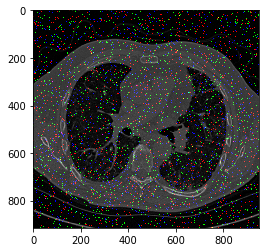

In [6]:
plt.imshow(img_gauss,cmap = cm.gray)

In [7]:
#Median FIlter
img_filter = cv2.medianBlur(img_gauss,5)

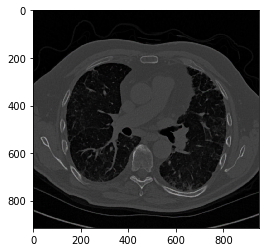

In [8]:
plt.imshow(img_filter,cmap = cm.gray)

In [9]:
def salt_pepper(img):
    row = img.shape[0]
    col = img.shape[1]
    number_of_pixels = random.randint(300,10000)
    for i in range(number_of_pixels):
        y = random.randint(0, row-1)
        x = random.randint(0,col-1)
        img[y][x] = 255
        
    number_of_pixels = random.randint(300,10000)
    for i in range(number_of_pixels):
        y = random.randint(0, row-1)
        x = random.randint(0,col-1)
        img[y][x] = 0
    return img

In [10]:
img3 = salt_pepper(img1)
img4 = salt_pepper(img2)

Text(0.5, 1.0, 'Noisy image2')

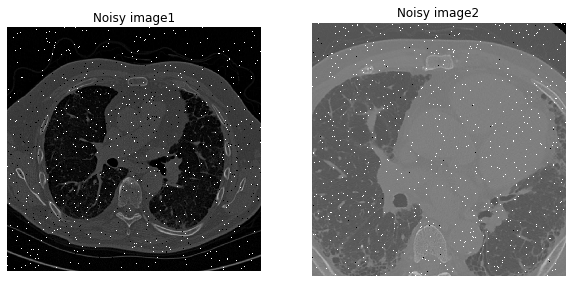

In [11]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img3,cmap = cm.gray)
plt.axis('off')
plt.title("Noisy image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img4,cmap = cm.gray)
plt.axis('off')
plt.title("Noisy image2")

# Removing the Noise by mean filter

In [12]:
img_filt_mean1 = cv2.blur(img3,(5,5))
img_filt_mean2 = cv2.blur(img4,(5,5))

Text(0.5, 1.0, 'filtered image2')

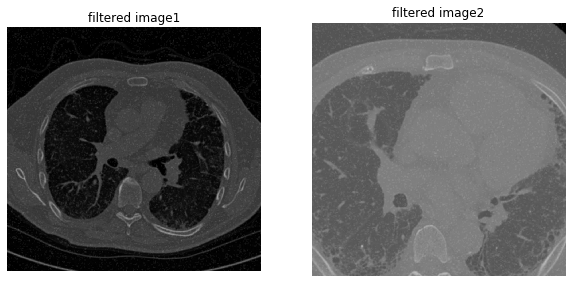

In [13]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img_filt_mean1,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img_filt_mean2,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image2")

# Histogram Equalization

In [14]:
#hist = cv2.calcHist([img_blur1],[0],None,[256],[0,255])

In [15]:
# plot the histogram
#plt.figure()
#plt.title("Grayscale Histogram")
#plt.xlabel("Bins")
#plt.ylabel("# of Pixels")
#plt.plot(hist)
#plt.xlim([0, 256])

In [16]:
# normalize the histogram
#hist /= hist.sum()


In [17]:
# plot the normalized histogram
#plt.figure()
#plt.title("Grayscale Histogram (Normalized)")
#plt.xlabel("Bins")
#plt.ylabel("% of Pixels")
#plt.plot(hist)
#plt.xlim([0, 256])
#plt.show()


In [18]:
#cum_hist_sum = np.zeros((256,1))
#cum_hist_sum[0] = hist[0]
#i = 1
#for i in range(256):
    #cum_hist_sum[i] = cum_hist_sum[i-1] + hist[i]

In [19]:
#row = img1.shape[0]
#col = img1.shape[1]
#total = row*col
#val = 1/256
#print(val)
#equalized histogram image will have frequency val for each intensity

In [20]:
#cum_hist_Eq = np.zeros((256,1))
#cum_hist_Eq[0] = val
#for i in range(256):
    #cum_hist_Eq[i] = cum_hist_Eq[i-1] + val

In [21]:
#Mapping = np.zeros((256,1))
#for i in range(256):
    #for j in range(256):
        #if (cum_hist_sum[i] == cum_hist_Eq[j]) or (cum_hist_sum[i] < cum_hist_Eq[j]):
            #break
    #Mapping[i] = j #Need to replace ith intensity of original image with jth intensity
    

In [22]:
#Equalized_image = np.zeros((row,col,3))
#for i in range(row):
    #for j in range(col):
        #Equalized_image[i,j] = img1[i,j] 

In [23]:
#plt.imshow(Equalized_image)

In [24]:
gray1 = cv2.cvtColor(img_filt_mean1, cv2.COLOR_BGR2GRAY)
#img_final = cv2.equalizeHist(gray)
clahe = cv2.createCLAHE(clipLimit = 2)
final_img1 = clahe.apply(gray1)

gray2 = cv2.cvtColor(img_filt_mean2, cv2.COLOR_BGR2GRAY)
#img_final = cv2.equalizeHist(gray)
clahe = cv2.createCLAHE(clipLimit = 3)
final_img2 = clahe.apply(gray2)

Text(0.5, 1.0, 'filtered image2')

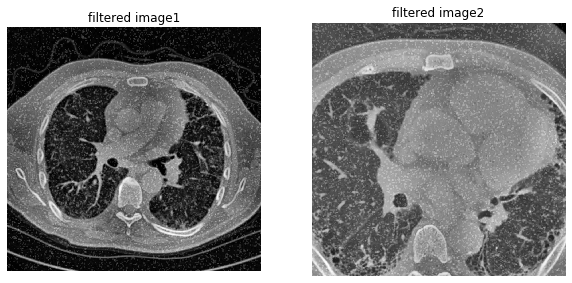

In [25]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(final_img1,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(final_img2,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image2")

(0, 256)

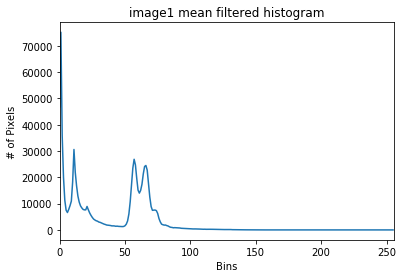

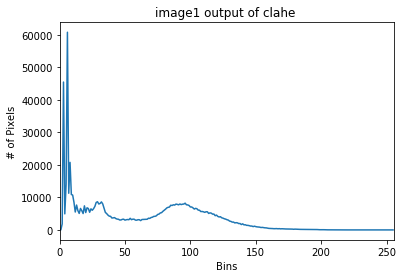

In [26]:
hist_filtered = cv2.calcHist([img_filt_mean1],[0],None,[256],[0,255])
hist_final_img1 = cv2.calcHist([final_img1],[0],None,[256],[0,255])
# plot the histogram
plt.figure()
plt.title("image1 mean filtered histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_filtered)
plt.xlim([0, 256])

# plot the histogram
plt.figure()
plt.title("image1 output of clahe ")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_final_img1)
plt.xlim([0, 256])

In [27]:
print(final_img1.shape)

(915, 951)


In [44]:
crop_img1 = final_img1[100:250, 350:550]
print(crop_img1.shape)

(150, 200)


##### plt.imshow(crop_img1,cmap = cm.gray)

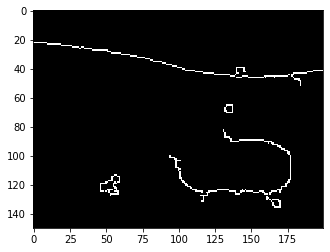

In [45]:
wide = cv2.Canny(crop_img1,100,250)
plt.imshow(wide,cmap = cm.gray)

In [46]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=crop_img2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=crop_img2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=crop_img2, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) #

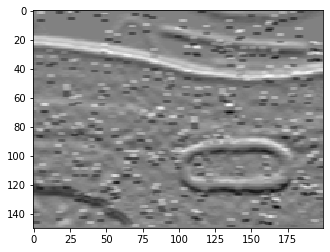

In [47]:
plt.imshow(sobelx,cmap = cm.gray)

# Line detection detection using Hough transform

In [48]:
#2d accumulator array to store rho and theta
arr = np.zeros((150,200))
row = wide.shape[0]
col = wide.shape[1]
print(row,col)
for i in range(row):
    for j in range(col):
        if wide[i,j] == 255:            
            #print(i,j)
            for t in range(180):
                rho = (i*math.cos(t/math.pi)) + (j*math.sin(t/math.pi))
                if rho.is_integer():
                    k = int(rho)
                    arr[k,t] = arr[k,t] + 1


150 200


In [49]:
max1 = 0
max2 = 0
max1_coord,max2_coord = [0,0],[0,0]
for i in range(150):
    for j in range(200):
        if arr[i,j] > max1:
            max1 = arr[i,j]
            max1_coord = [i,j]
        elif arr[i,j] > max2:
            max2 = arr[i,j]
            max2_coord = [i,j]
print(max1,max2) 
print(max2_coord)

40.0 23.0
[123, 0]


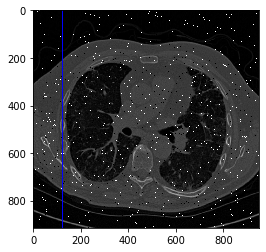

In [50]:
#Drawing Line on original image
a = np.cos(max1_coord[1])
b = np.sin(max1_coord[1])
x0 = a*max1_coord[0]
y0 = b*max1_coord[0]
x1 = int(x0 + 1000*(-b))
y1 = int(y0 + 1000*(a))
x2 = int(x0 - 1000*(-b))
y2 = int(y0 - 1000*(a))
cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img1)

# Circle detection using hough transform

In [51]:
# 3d accumulator array to store parameters center (a,b) and radius r
accumulator_circle = np.zeros((150,200,20))
row = wide.shape[0]
col = wide.shape[1]
#print(row,col)
for i in range(row):
    for j in range(col):
        if wide[i,j] == 255:
            #Will take various centers and predict radius
            for a in range(100,150):
                for b in range(125,200):
                    r = (i-a)^2 + (j-b)^2
                    if r>0:
                        r = math.sqrt(r)
                        l = int(r)
                        accumulator_circle[a,b,l] = accumulator_circle[a,b,l] + 1
                    

In [52]:
val = np.max(accumulator_circle)
for i in range(150):
    for j in range(200):
        for k in range(20):
            if accumulator_circle[i,j,k] == val:
                print(i,j,k)

149 172 10


# Ellipse detection using hough transform

In [53]:
# Window name in which image is displayed
window_name = 'Image'
   

# axes length a between 50 to 65 and axes length b will try between 20 to 40 
#axesLength = (60, 25) 
  
angle = 0
  
startAngle = 0
  
endAngle = 360
   
# Red color in BGR
color = (0, 0, 255)
   
# Line thickness of 5 px
thickness = 5
h,k = 500, 200 #Will work with this centre coordinates
centre_coordinates = [h,k]
accumulator_ellipse = np.zeros((100,1000))
row = wide.shape[0]
col = wide.shape[1]
arr1 = np.zeros((row*col + 1,1))
for i in range(row):
    for j in range(col):
        if wide[i,j] == 255:
            #Will take various centers and predict radius
            for a in range(1,65):
                    val = (1 - ((i)**2)/(a**2))
                    if val != 0:
                        b_val = ((j)**2)/val
                        if b_val >0:
                            b = math.sqrt(b_val)
                            b = int(b)
                            accumulator_ellipse[a,b] = accumulator_ellipse[a,b] + 1

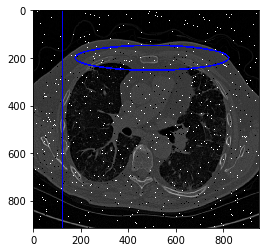

In [55]:
#print(np.max(accumulator_ellipse))
center_coordinates = (500,200)
max1,max2 = 0,0
max1_coord = [0,0]
max2_coord = [0,0]
for i in range(accumulator_ellipse.shape[0]):
    for j in range(accumulator_ellipse.shape[1]):
        if accumulator_ellipse[i,j] > max1:
            max1 = accumulator_ellipse[i,j]
            max1_coord = [i,j]
        elif accumulator_ellipse[i,j]>max2:
            max2 = accumulator_ellipse[i,j]
            max2_coord = [i,j]
#print(max1_coord,max2_coord)
axesLength = (max1_coord[1],max1_coord[0])
image = cv2.ellipse(img1, center_coordinates, axesLength,angle, startAngle, endAngle, color, thickness)
# Displaying the image 
plt.imshow(image,cmap = 'gray') 

# Lamet curve detection using Hough transform
#Still Work in progress

In [ ]:
#Lamet curve fitting b * (x**4) + (a**4) * (y**4) - (a**4)*b and parameter is a and b
# define the true objective function
def objective(x, y, a, b):
	return b * (x**4) + (a**4) * (y**4) - (a**4)*b

In [364]:
accumulator_lamet = np.zeros((50916,4))
row = wide.shape[0]
col = wide.shape[1]
ar = np.zeros(((row*col)+1,1))
print(ar.shape)
i = 0
#print(row,col)
for x in range(row):
    for y in range(col):
        for a in range(4):
            if ((x**2) - (a**2)) != 0:
                b = ((a**2) * (y**2))/((x**2) - (a**2)) #From Lamet curve
                if b>0:
                    b = int(b)
                    accumulator_lamet[b,a] = accumulator_lamet[b,a] + 1

(30001, 1)


In [368]:
val = np.max(accumulator_lamet)
for i in range(50916):
    for j in range(4):
        if accumulator_lamet[i,j] == val:
            print(accumulator_lamet[i,j])

11026.0 11026.0


In [ ]:
y1 = objective(arr[])